<a href="https://colab.research.google.com/github/Lamar-yasir18/testrepo/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **import libraries and load the data set**

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
# Load the Fashion MNIST dataset
# Train
train_fashion_mnist = fashion_mnist.as_numpy(fashion_mnist.load("fashion_mnist", split="train", batch_size=-1))
X_train, y_train = train_fashion_mnist["image"], train_fashion_mnist["label"]
# Test
test_fashion_mnist = fashion_mnist.as_numpy(fashion_mnist.load("fashion_mnist", split="test", batch_size=-1))
X_test, y_test = test_fashion_mnist["image"], test_fashion_mnist["label"]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.N65OWQ_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.N65OWQ_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
# Print the number of training and test samples
print("Train Samples:", len(X_train))
print("Test Samples:", len(X_test))
# Define fashion classes
fashion_classes = {0: 'T-shirt/top',
                   1: 'Trouser',
                   2: 'Pullover',
                   3: 'Dress',
                   4: 'Coat',
                   5: 'Sandal',
                   6: 'Shirt',
                   7: 'Sneaker',
                   8: 'Bag',
                   9: 'Ankle boot'}

Train Samples: 60000
Test Samples: 10000


# **Data Preprocessing**

In [ ]:
# Check for any missing values in the dataset
if np.any(np.isnan(X_train)) or np.any(np.isnan(y_train)):
    print("Found missing values in training data.")
if np.any(np.isnan(X_test)) or np.any(np.isnan(y_test)):
    print("Found missing values in testing data.")

In [ ]:
# Define the options for data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,         # Randomly rotate images within 10 degrees
    horizontal_flip=True,      # Randomly flip images horizontally
    fill_mode='nearest'        # Fill new pixels with the nearest pixel values
)

# Function to preprocess data
def preprocess_data(images, use_augmentation=False):
    X = []
    for x_ in images:
        # Scale pixel values between 0.0-1.0
        x_ = x_ / 255.0
        # Data augmentation without increasing the number of images
        if use_augmentation:
            x_ = next(datagen.flow(x_.reshape(1, 28, 28, 1), batch_size=1))[0]
        X.append(x_)
    return np.array(X)

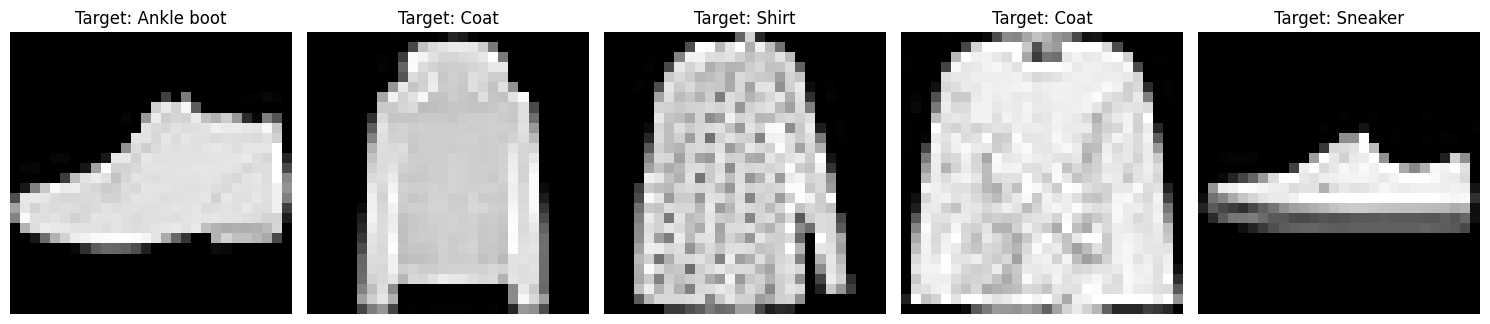

In [ ]:
# Visualizing 5 random images
num_images = 5
indices = np.random.randint(len(X_train), size=num_images)
# Create a figure with subplots
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
for ax, idx in zip(axes, indices):
    ax.imshow(np.squeeze(X_train[idx]), cmap='gray')
    ax.axis('off')  # Turn off axis
    ax.set_title(f"Target: {fashion_classes[y_train[idx]]}")

plt.tight_layout()
plt.show()

In [ ]:
# Preprocess training and test data
X_train_shaped = preprocess_data(X_train, use_augmentation=True).reshape((X_train.shape[0], 28, 28, 1))
X_test_shaped = preprocess_data(X_test).reshape((X_test.shape[0], 28, 28, 1))
# One-hot encode labels
y_train_shaped = tf.keras.utils.to_categorical(y_train)
y_test_shaped = tf.keras.utils.to_categorical(y_test)

In [ ]:
# Flatten the training and test data for traditional classifiers
X_train_flat = X_train_shaped.reshape((X_train_shaped.shape[0], 28 * 28))
X_test_flat = X_test_shaped.reshape((X_test_shaped.shape[0], 28 * 28))

In [ ]:
# Split data for training and validation
X_train_, X_val_, y_train_, y_val_ = train_test_split(X_train_shaped, y_train_shaped, test_size=0.2, random_state=42)
X_train_flat_, X_val_flat_, y_train_flat_, y_val_flat_ = train_test_split(X_train_flat, y_train_shaped, test_size=0.2, random_state=42)

# Bulid CNN Model and tray different epoche and plot **results**

In [ ]:
# Import the necessary layers from Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
# Building a CNN model
cnn = Sequential()
cnn.add(InputLayer(input_shape=(28, 28, 1)))  # Input layer

# Normalization
cnn.add(BatchNormalization())

# Conv + Maxpooling
cnn.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout
cnn.add(Dropout(0.1))

# Conv + Maxpooling
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout
cnn.add(Dropout(0.3))

# Converting 3D feature to 1D feature vector
cnn.add(Flatten())

# Fully Connected Layer
cnn.add(Dense(256, activation='relu'))

# Dropout
cnn.add(Dropout(0.5))

# Fully Connected Layer
cnn.add(Dense(64, activation='relu'))

# Normalization
cnn.add(BatchNormalization())

# Output Layer
cnn.add(Dense(10, activation='softmax'))

# Compile the CNN model
cnn.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(), metrics=['accuracy'])

# Print the model summary
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization                  │ (None, 28, 28, 1)           │               4 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 645,006 (2.46 MB)

 Trainable params: 644,876 (2.46 MB)

 Non-trainable params: 130 (520.00 B)

# Model: Sequential
# Summary of each layer in the CNN model architecture:

# 1. Batch Normalization:
#    - Normalizes input data (shape: 28x28 with 1 channel) to stabilize training.
#    - Parameters: 4

# 2. Conv2D (Convolutional Layer):
#    - A convolutional layer with 64 filters of size 3x3.
#    - Output shape: 28x28 with 64 channels.
#    - Parameters: 640

# 3. Max Pooling 2D:
#    - Reduces spatial dimensions to 14x14, preserving depth.
#    - Parameters: 0

# 4. Dropout:
#    - Randomly disables some connections to reduce overfitting.
#    - Parameters: 0

# 5. Conv2D (Second Convolutional Layer):
#    - Another convolutional layer with 64 filters of size 3x3.
#    - Output shape: 12x12 with 64 channels.
#    - Parameters: 36,928

# 6. Max Pooling 2D (Second Max Pooling):
#    - Further reduces dimensions to 6x6, maintaining depth.
#    - Parameters: 0

# 7. Dropout:
#    - Second dropout layer for regularization.
#    - Parameters: 0

# 8. Flatten:
#    - Flattens the 3D input to a 1D vector (2304 units).
#    - Parameters: 0

# 9. Dense:
#    - A dense (fully connected) layer with 256 units.
#    - Parameters: 590,080

# 10. Dropout:
#    - Third dropout layer to prevent overfitting.
#    - Parameters: 0

# 11. Dense:
#    - Dense layer with 64 units.
#    - Parameters: 16,448

# 12. Batch Normalization:
#    - Normalizes output from the previous layer.
#    - Parameters: 256

# 13. Dense (Output Layer):
#    - Final dense layer with 10 units (one for each class).
#    - Parameters: 650

# Total Parameters: 645,006 (2.46 MB)
# - Trainable Parameters: 644,876 (2.46 MB)
# - Non-trainable Parameters: 130 (520.00 B)


In [ ]:
# Train the CNN model using augmented data 10 epochs
cnn_history = cnn.fit(
    X_train_, y_train_,
    batch_size=250,
    epochs=10,
    verbose=1,
    validation_data=(X_val_, y_val_),
)

Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 103s 522ms/step - accuracy: 0.6109 - loss: 1.1007 - val_accuracy: 0.7368 - val_loss: 1.1403
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 141s 520ms/step - accuracy: 0.8282 - loss: 0.4710 - val_accuracy: 0.8604 - val_loss: 0.4015
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 141s 517ms/step - accuracy: 0.8556 - loss: 0.3922 - val_accuracy: 0.8752 - val_loss: 0.3338
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 141s 510ms/step - accuracy: 0.8725 - loss: 0.3501 - val_accuracy: 0.8904 - val_loss: 0.3007
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 144s 521ms/step - accuracy: 0.8779 - loss: 0.3258 - val_accuracy: 0.8902 - val_loss: 0.2955
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 100s 520ms/step - accuracy: 0.8880 - loss: 0.3035 - val_accuracy: 0.8975 - val_loss: 0.2796
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 143s 524ms/step - accuracy: 0.8908 - loss: 0.2923 - val_accuracy: 0.8981 - val_loss: 0.2840
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 101s 528ms/step - accuracy: 0.8946 -

In [ ]:
# Try more epochs 15
cnn_history2 = cnn.fit(
    X_train_, y_train_,
    batch_size=250,
    epochs=15,
    verbose=1,
    validation_data=(X_val_, y_val_)
)

Epoch 1/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 94s 490ms/step - accuracy: 0.9057 - loss: 0.2502 - val_accuracy: 0.9019 - val_loss: 0.2665
Epoch 2/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 143s 496ms/step - accuracy: 0.9096 - loss: 0.2399 - val_accuracy: 0.9049 - val_loss: 0.2543
Epoch 3/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 141s 490ms/step - accuracy: 0.9134 - loss: 0.2294 - val_accuracy: 0.9107 - val_loss: 0.2432
Epoch 4/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 142s 491ms/step - accuracy: 0.9170 - loss: 0.2214 - val_accuracy: 0.9111 - val_loss: 0.2436
Epoch 5/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 143s 496ms/step - accuracy: 0.9206 - loss: 0.2105 - val_accuracy: 0.9058 - val_loss: 0.2569
Epoch 6/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 94s 492ms/step - accuracy: 0.9208 - loss: 0.2139 - val_accuracy: 0.9124 - val_loss: 0.2427
Epoch 7/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 143s 496ms/step - accuracy: 0.9202 - loss: 0.2087 - val_accuracy: 0.9115 - val_loss: 0.2456
Epoch 8/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 95s 495ms/step - accuracy: 0.9267 - lo

In [ ]:
# Try more epochs 20
cnn_history3 = cnn.fit(
    X_train_, y_train_,
    batch_size=250,
    epochs=20,
    verbose=1,
    validation_data=(X_val_, y_val_)
)

Epoch 1/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 95s 497ms/step - accuracy: 0.9370 - loss: 0.1689 - val_accuracy: 0.9137 - val_loss: 0.2533
Epoch 2/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 138s 479ms/step - accuracy: 0.9368 - loss: 0.1678 - val_accuracy: 0.9133 - val_loss: 0.2517
Epoch 3/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 143s 484ms/step - accuracy: 0.9406 - loss: 0.1569 - val_accuracy: 0.9126 - val_loss: 0.2484
Epoch 4/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 95s 497ms/step - accuracy: 0.9402 - loss: 0.1582 - val_accuracy: 0.9137 - val_loss: 0.2470
Epoch 5/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 139s 483ms/step - accuracy: 0.9418 - loss: 0.1561 - val_accuracy: 0.9162 - val_loss: 0.2441
Epoch 6/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 145s 501ms/step - accuracy: 0.9420 - loss: 0.1517 - val_accuracy: 0.9133 - val_loss: 0.2511
Epoch 7/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 140s 491ms/step - accuracy: 0.9439 - loss: 0.1487 - val_accuracy: 0.9154 - val_loss: 0.2469
Epoch 8/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 143s 494ms/step - accuracy: 0.9417 - l

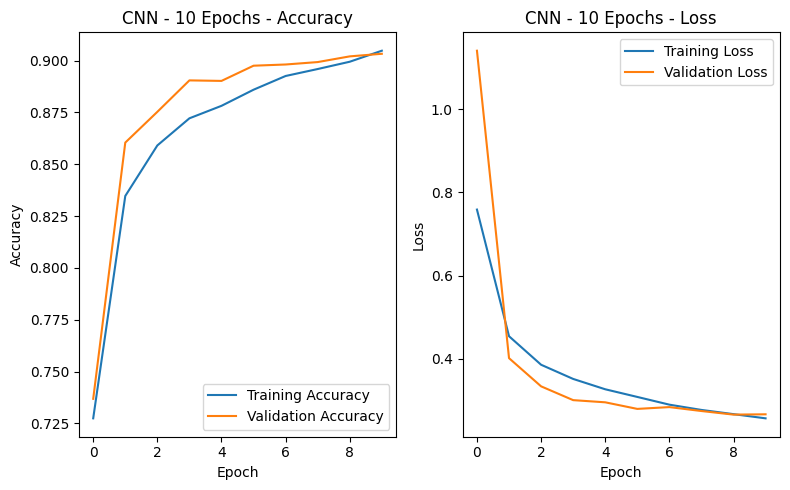

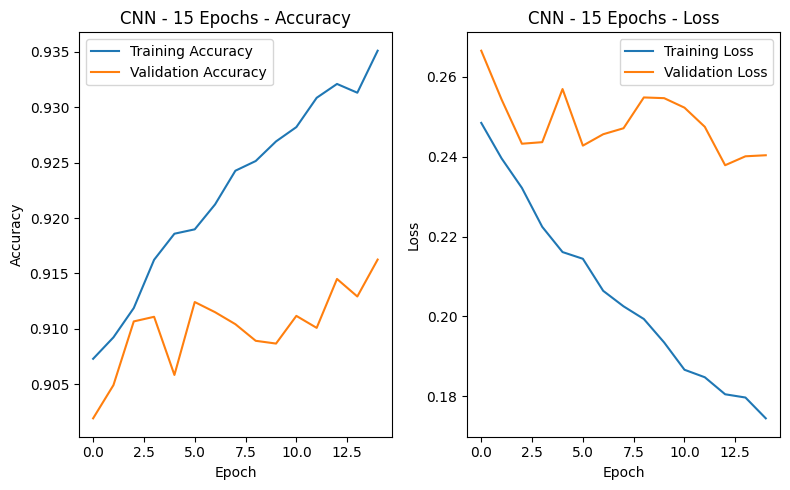

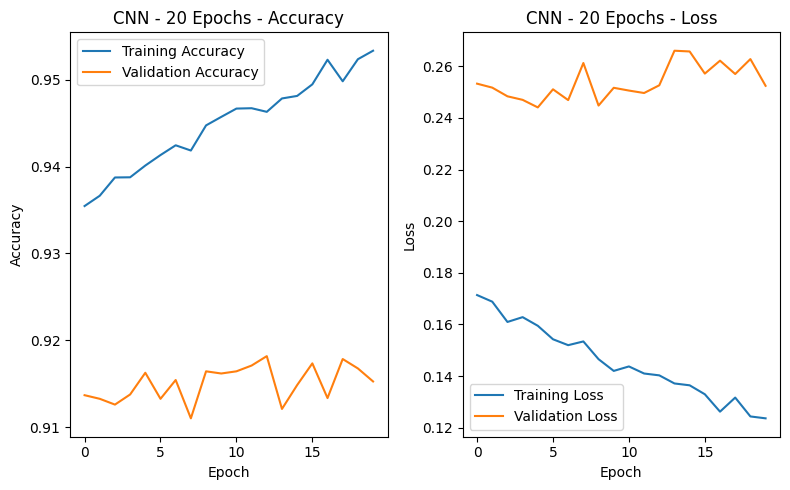

In [ ]:
# Plotting accuracy and loss curves for the CNN model
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.figure(figsize=(8, 5))

    # plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function for each model to illustrate the results of each configuration
plot_history(cnn_history, 'CNN - 10 Epochs')
plot_history(cnn_history2, 'CNN - 15 Epochs')
plot_history(cnn_history3, 'CNN - 20 Epochs')

# Bulid FFNN Model and tray different epoche and plot **results**

In [ ]:
# Building a Feedforward Neural Network
ff = Sequential()
ff.add(InputLayer(input_shape=(28 * 28,)))  # Input layer

# Normalization
ff.add(BatchNormalization())

# Fully Connected Layer
ff.add(Dense(512, activation='relu'))

# Dropout
ff.add(Dropout(0.5))

# Fully Connected Layer
ff.add(Dense(256, activation='relu'))

# Dropout
ff.add(Dropout(0.3))

# Fully Connected Layer
ff.add(Dense(128, activation='relu'))

# Normalization
ff.add(BatchNormalization())

# Output Layer
ff.add(Dense(10, activation='softmax'))

# Compile the Feedforward Neural Network
ff.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(), metrics=['accuracy'])

# Print the model summary
ff.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_4                │ (None, 784)                 │           3,136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 571,082 (2.18 MB)

 Trainable params: 569,258 (2.17 MB)

 Non-trainable params: 1,824 (7.12 KB)

# Model: Sequential_2
# Summary of each layer in the fully connected neural network architecture:

# 1. Batch Normalization:
#    - Normalizes input data (flattened to 784 units) for stable training.
#    - Parameters: 3,136

# 2. Dense:
#    - Fully connected layer with 512 units.
#    - Parameters: 401,920

# 3. Dropout:
#    - Randomly disables some connections to reduce overfitting.
#    - Parameters: 0

# 4. Dense:
#    - Fully connected layer with 256 units.
#    - Parameters: 131,328

# 5. Dropout:
#    - Another dropout layer to prevent overfitting.
#    - Parameters: 0

# 6. Dense:
#    - Fully connected layer with 128 units.
#    - Parameters: 32,896

# 7. Batch Normalization:
#    - Normalizes output from the previous layer (128 units).
#    - Parameters: 512

# 8. Dense (Output Layer):
#    - Final dense layer with 10 units (one for each class).
#    - Parameters: 1,290

# Total Parameters: 571,082 (2.18 MB)
# - Trainable Parameters: 569,258 (2.17 MB)
# - Non-trainable Parameters: 1,824 (7.12 KB)


In [ ]:
#Train the Feedforward 10 epoche
ff_history = ff.fit(
    X_train_flat_, y_train_flat_,
    batch_size=250,
    epochs=10,
    verbose=1,
    validation_data=(X_val_flat_, y_val_flat_)
)

Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.6418 - loss: 1.0119 - val_accuracy: 0.8119 - val_loss: 0.5691
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.7976 - loss: 0.5539 - val_accuracy: 0.8358 - val_loss: 0.4413
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8214 - loss: 0.4849 - val_accuracy: 0.8489 - val_loss: 0.4168
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.8301 - loss: 0.4600 - val_accuracy: 0.8497 - val_loss: 0.4020
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.8386 - loss: 0.4364 - val_accuracy: 0.8515 - val_loss: 0.3965
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.8483 - loss: 0.4178 - val_accuracy: 0.8601 - val_loss: 0.3799
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.8544 - loss: 0.3951 - val_accuracy: 0.8618 - val_loss: 0.3745
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.8577 - loss: 0.3825 - val_a

In [ ]:
#Train the Feedforward model 15 epoche
ff_history2 = ff.fit(
    X_train_flat_, y_train_flat_,
    batch_size=250,
    epochs=15,
    verbose=1,
    validation_data=(X_val_flat_, y_val_flat_)
)

Epoch 1/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8727 - loss: 0.3466 - val_accuracy: 0.8749 - val_loss: 0.3463
Epoch 2/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8709 - loss: 0.3477 - val_accuracy: 0.8715 - val_loss: 0.3439
Epoch 3/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.8793 - loss: 0.3292 - val_accuracy: 0.8791 - val_loss: 0.3399
Epoch 4/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8789 - loss: 0.3249 - val_accuracy: 0.8720 - val_loss: 0.3455
Epoch 5/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.8779 - loss: 0.3228 - val_accuracy: 0.8809 - val_loss: 0.3294
Epoch 6/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.8823 - loss: 0.3152 - val_accuracy: 0.8744 - val_loss: 0.3441
Epoch 7/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.8832 - loss: 0.3137 - val_accuracy: 0.8787 - val_loss: 0.3448
Epoch 8/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.8830 - loss: 0.3102 - val_ac

In [ ]:
#Train the Feedforward model using 20 epoche
ff_history3 = ff.fit(
    X_train_flat_, y_train_flat_,
    batch_size=250,
    epochs=20,
    verbose=1,
    validation_data=(X_val_flat_, y_val_flat_)
)

Epoch 1/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9002 - loss: 0.2666 - val_accuracy: 0.8792 - val_loss: 0.3432
Epoch 2/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9014 - loss: 0.2620 - val_accuracy: 0.8804 - val_loss: 0.3330
Epoch 3/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.9041 - loss: 0.2538 - val_accuracy: 0.8833 - val_loss: 0.3336
Epoch 4/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9047 - loss: 0.2564 - val_accuracy: 0.8813 - val_loss: 0.3401
Epoch 5/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9061 - loss: 0.2476 - val_accuracy: 0.8788 - val_loss: 0.3494
Epoch 6/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9083 - loss: 0.2442 - val_accuracy: 0.8852 - val_loss: 0.3314
Epoch 7/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9075 - loss: 0.2466 - val_accuracy: 0.8848 - val_loss: 0.3355
Epoch 8/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9097 - loss: 0.2370 - val_

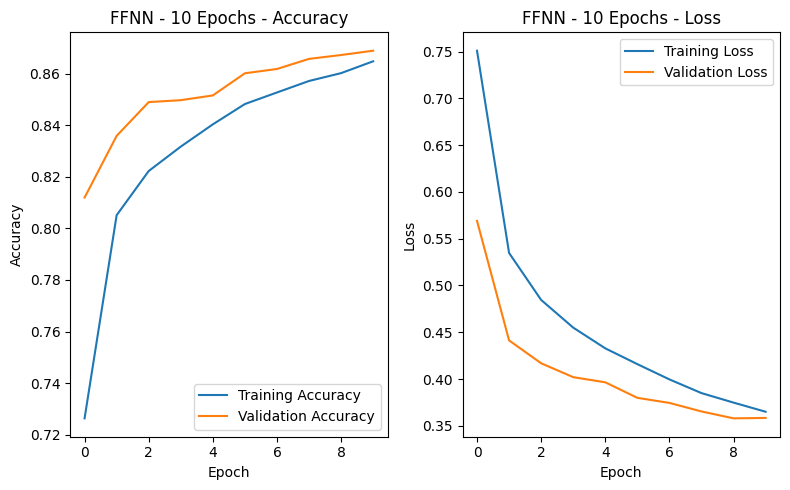

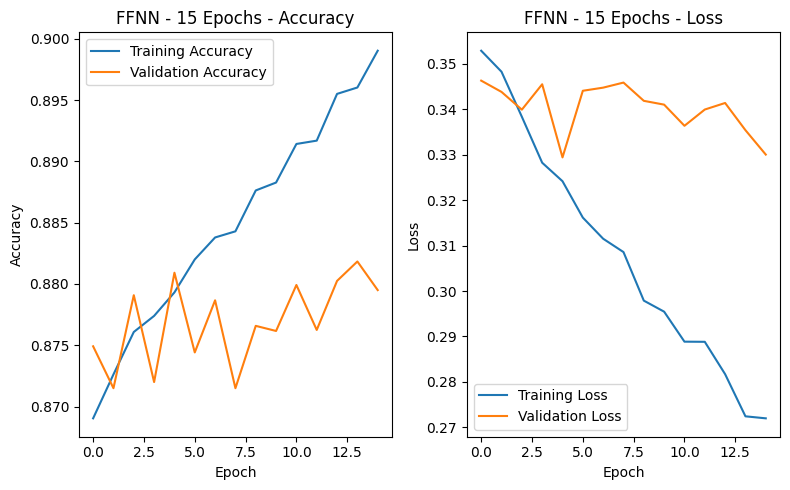

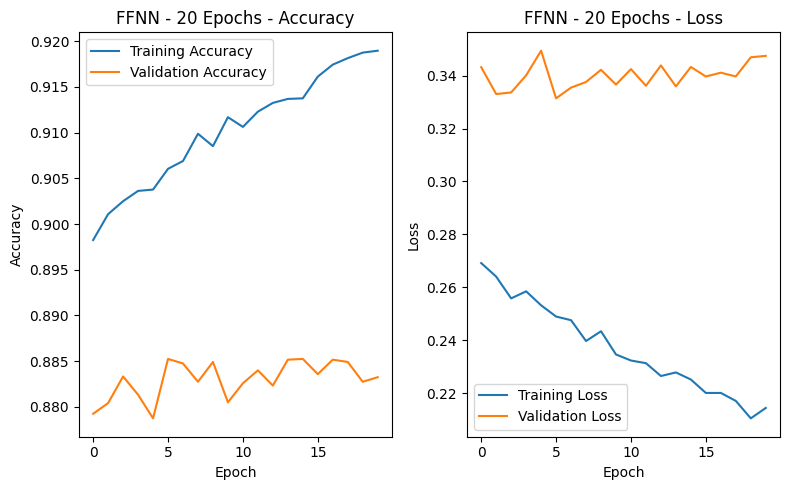

In [ ]:
# Plotting accuracy and loss curves for the FFNN model
def plot_history(history, title):
    plt.figure(figsize=(8, 5))

    # plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function for each model to illustrate the results of each configuration
plot_history(ff_history, 'FFNN - 10 Epochs')
plot_history(ff_history2, 'FFNN - 15 Epochs')
plot_history(ff_history3, 'FFNN - 20 Epochs')

# **Get Predictions From CNN and FFNN**

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


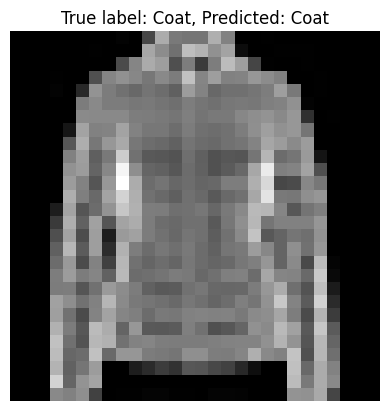

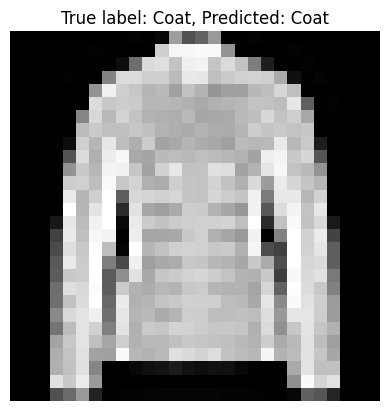

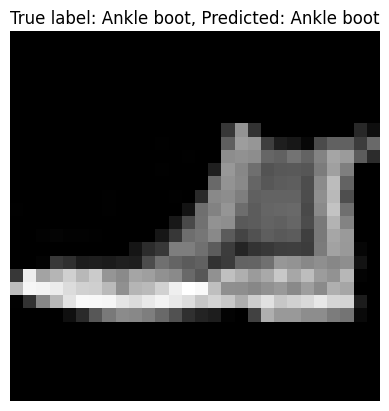

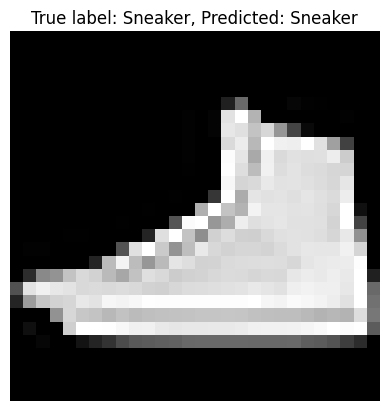

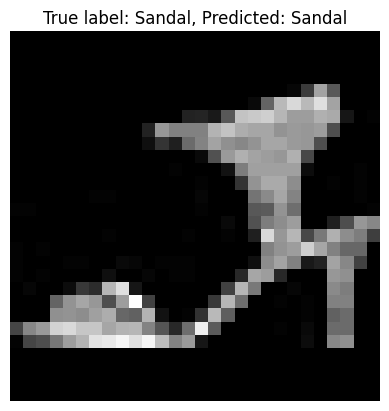

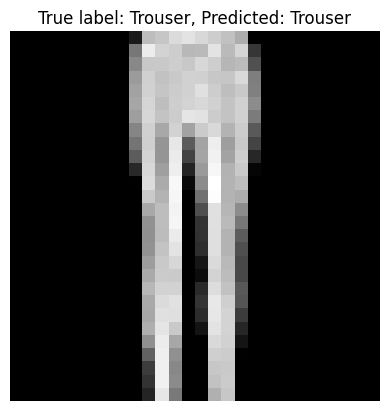

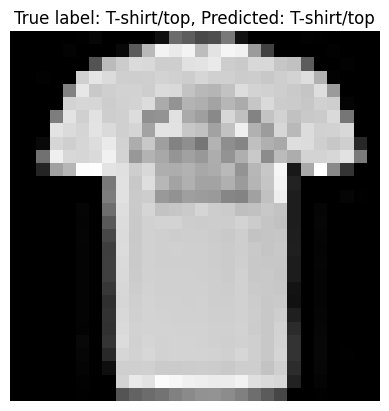

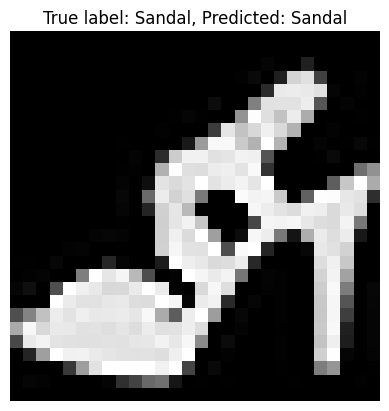

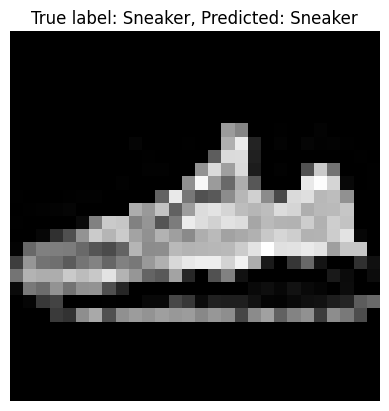

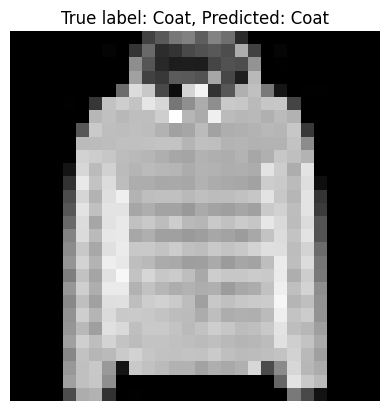


Classification Report for CNN:
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.83      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.90      0.86      0.88      1000
       Dress       0.91      0.92      0.92      1000
        Coat       0.86      0.90      0.88      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.74      0.79      0.77      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.98      0.94      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# Predictions and Evaluation for CNN
cnn_predictions = cnn.predict(X_test_shaped).argmax(axis=-1)

# Display Predictions
for index in range(10):
    plt.imshow(X_test[index], cmap='gray')
    plt.title(f"True label: {fashion_classes[y_test[index]]}, Predicted: {fashion_classes[cnn_predictions[index]]}")
    plt.axis('off')
    plt.show()

# Classification Report for CNN
print("\nClassification Report for CNN:")
print(classification_report(y_test, cnn_predictions, target_names=list(fashion_classes.values())))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


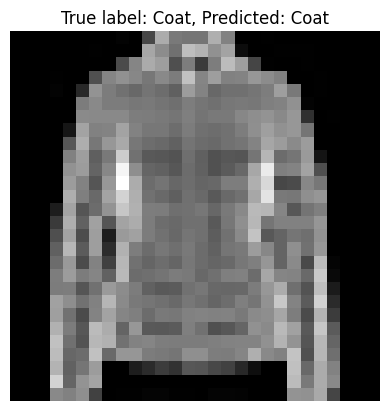

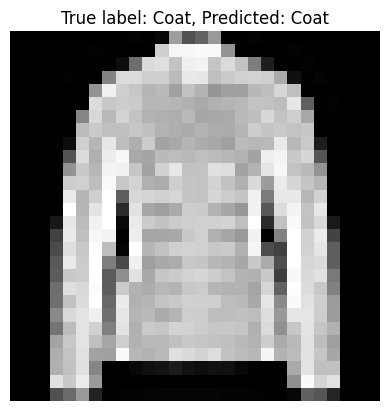

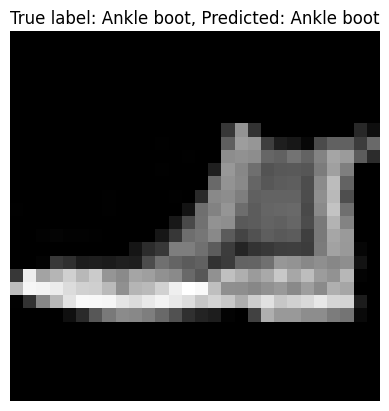

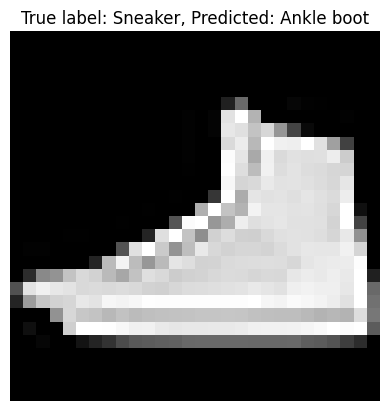

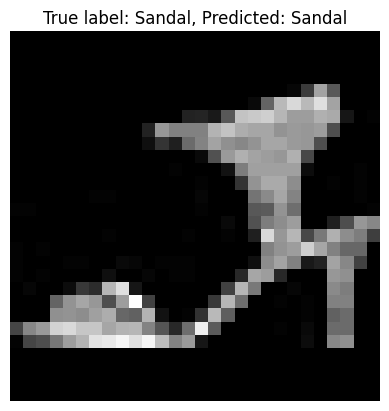

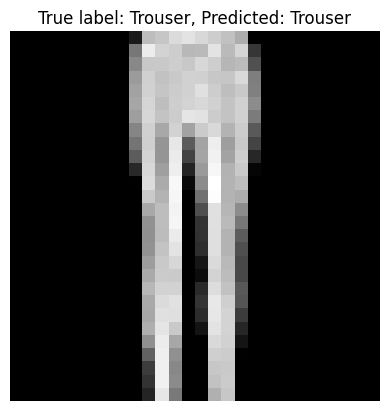

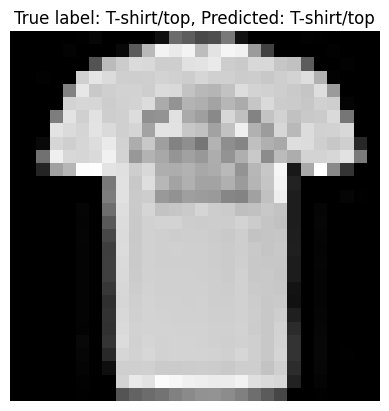

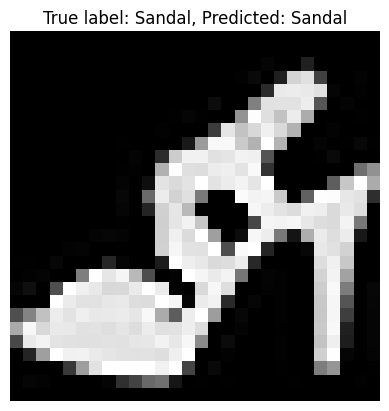

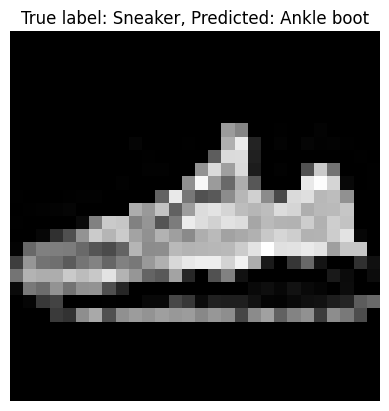

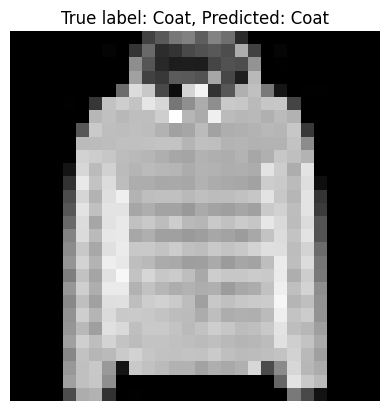


Classification Report for FFNN:
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.79      0.80      1000
     Trouser       0.97      0.95      0.96      1000
    Pullover       0.75      0.75      0.75      1000
       Dress       0.82      0.85      0.84      1000
        Coat       0.60      0.75      0.66      1000
      Sandal       0.99      0.69      0.81      1000
       Shirt       0.56      0.37      0.45      1000
     Sneaker       0.96      0.54      0.69      1000
         Bag       0.92      0.97      0.94      1000
  Ankle boot       0.55      1.00      0.71      1000

    accuracy                           0.76     10000
   macro avg       0.79      0.76      0.76     10000
weighted avg       0.79      0.76      0.76     10000



In [ ]:
# Flatten X_test for FFNN
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Predictions and Evaluation for FFNN
ff_predictions = ff.predict(X_test_flat).argmax(axis=-1)

# Display Predictions
for index in range(10):
    plt.imshow(X_test[index], cmap='gray')
    plt.title(f"True label: {fashion_classes[y_test[index]]}, Predicted: {fashion_classes[ff_predictions[index]]}")
    plt.axis('off')
    plt.show()

# Classification Report for FFNN
print("\nClassification Report for FFNN:")
print(classification_report(y_test, ff_predictions, target_names=list(fashion_classes.values())))

# **Confusion Matrix to evalute the Deep Learning Models**

<Figure size 1000x800 with 0 Axes>

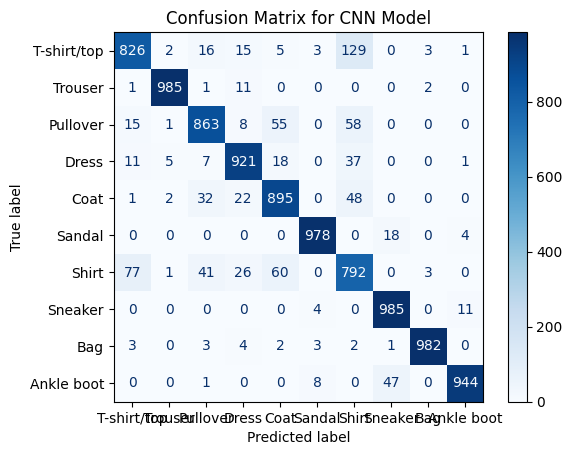

<Figure size 1000x800 with 0 Axes>

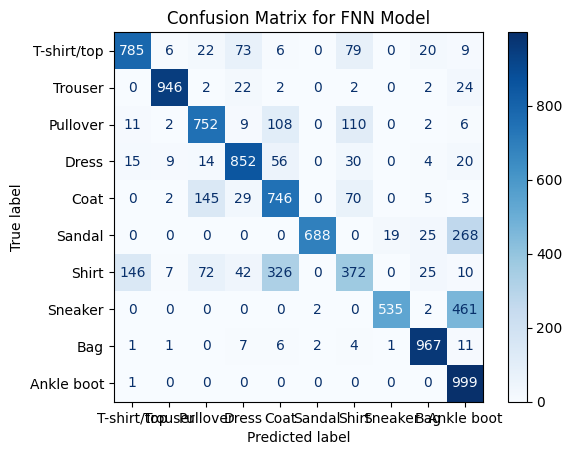

In [ ]:
# Confusion Matrix for CNN
cnn_cm = confusion_matrix(y_test, cnn_predictions)
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay(cnn_cm, display_labels=list(fashion_classes.values())).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for CNN Model')
plt.show()

# Confusion Matrix for FNN
fnn_cm = confusion_matrix(y_test, ff_predictions)
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay(fnn_cm, display_labels=list(fashion_classes.values())).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for FNN Model')
plt.show()

In [ ]:
from sklearn.metrics import  classification_report
# Get predictions from the CNN model
cnn_predictions = cnn.predict(X_test_shaped)
cnn_predicted_classes = np.argmax(cnn_predictions, axis=1)

# Get predictions from the FNN model
ff_predictions = ff.predict(X_test_flat)
ff_predicted_classes = np.argmax(ff_predictions, axis=1)

# Evaluation Reports
print("Classification Report for CNN Model:\n")
print(classification_report(y_test, cnn_predicted_classes, target_names=list(fashion_classes.values())))

print("Classification Report for FNN Model:\n")
print(classification_report(y_test, ff_predicted_classes, target_names=list(fashion_classes.values())))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report for CNN Model:

              precision    recall  f1-score   support

 T-shirt/top       0.88      0.83      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.90      0.86      0.88      1000
       Dress       0.91      0.92      0.92      1000
        Coat       0.86      0.90      0.88      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.74      0.79      0.77      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.98      0.94      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

Classification Report for FNN Model:

              precision    recall  f1-score   support

 T-shirt/top       0.82    

# **Machine Learning with RandomForestClassifier and SVC**

In [ ]:
# Importing classifiers for comparison
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Importing additional classifiers for comparison
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
svm_classifier = SVC(kernel='linear', probability=True)

# Train RandomForestClassifier
rf_classifier.fit(X_train_flat, y_train)
rf_predicted_classes = rf_classifier.predict(X_test_flat)
print("Classification Report for RandomForestClassifier:\n")
print(classification_report(y_test, rf_predicted_classes, target_names=list(fashion_classes.values())))

# Train SVC
svm_classifier.fit(X_train_flat, y_train)
svm_predicted_classes = svm_classifier.predict(X_test_flat)
print("Classification Report for SVM Classifier:\n")
print(classification_report(y_test, svm_predicted_classes, target_names=list(fashion_classes.values())))

Classification Report for RandomForestClassifier:

              precision    recall  f1-score   support

 T-shirt/top       0.66      0.32      0.43      1000
     Trouser       0.95      0.91      0.93      1000
    Pullover       0.44      0.54      0.49      1000
       Dress       0.77      0.80      0.78      1000
        Coat       0.42      0.48      0.45      1000
      Sandal       0.96      0.81      0.88      1000
       Shirt       0.24      0.31      0.27      1000
     Sneaker       0.74      0.92      0.82      1000
         Bag       0.97      0.84      0.90      1000
  Ankle boot       0.88      0.81      0.84      1000

    accuracy                           0.67     10000
   macro avg       0.70      0.67      0.68     10000
weighted avg       0.70      0.67      0.68     10000

Classification Report for SVM Classifier:

              precision    recall  f1-score   support

 T-shirt/top       0.77      0.78      0.77      1000
     Trouser       0.84      0.97     